# Clustering

In [3]:
# We are going to use a beer dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt'
beer = pd.read_csv(url, sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [4]:
# define X
X = beer.drop('name', axis =1)

## K-means clustering

### 1. Use scikit learn to perform K-means with 3 clusters

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [7]:
# you can review the cluter lables
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1], dtype=int32)

### 2. Save the cluster lables and sort by cluster

In [9]:
beer['cluster'] = km.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,0
4,Heineken,152,11,5.0,0.77,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0


### 3. Calculate the mean of each feature for each cluster

In [10]:
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


In [17]:
# save the DataFrame of cluster centers
centers = beer.groupby('cluster').mean()

### 4. Scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2-blue)

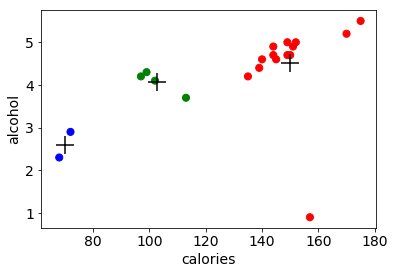

In [19]:
plt.rcParams['font.size'] = 14
colors = np.array(['red', 'green', 'blue', 'yellow'])

plt.scatter(beer.calories, beer.alcohol, c=colors[beer.cluster], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

plt.xlabel('calories')
plt.ylabel('alcohol')

### 5. Scatter plot matrix (0=red, 1=green, 2=blue)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113783198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114340c50>]], dtype=object)

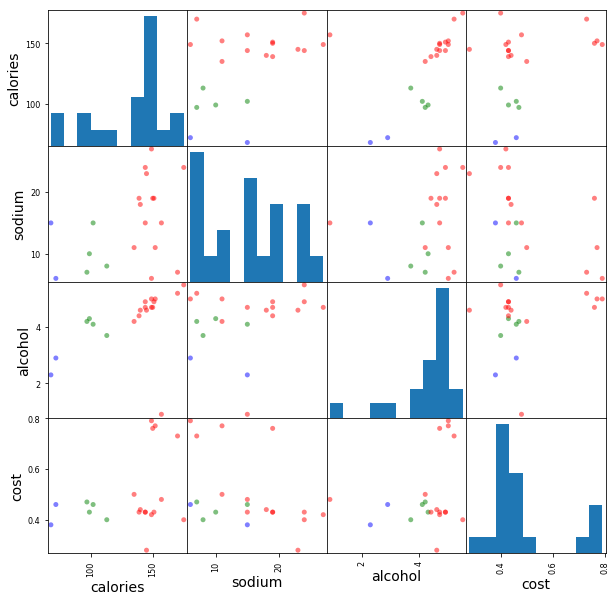

In [21]:
pd.plotting.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100)

#### Repeat with scaled data

In [22]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 1. K-means with 3 clusters on scaled data

In [23]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

### 2. Save the cluster labels and sort by cluster

In [24]:
beer['cluster'] = km.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1
12,Michelob_Light,135,11,4.2,0.50,1


## Clustering evaluation

We use **Silhouette Coefficient** (**sc**)to evaluate our clustering here. The **Silhouette Coefficient** is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known

### 1. Calculate SC for K = 3

In [25]:
from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_)

0.4577741591090948

### 2. Calculate SC for K=2 through K=19

In [26]:
k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

### 3. Plot the results above

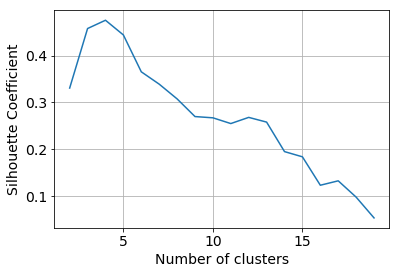

In [27]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

## DBSCAN clustering

### 1. DBSCAN with eps=1 and min_samples=3

In [28]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1, min_samples=3)
db.fit(X_scaled)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
    min_samples=3, n_jobs=1, p=None)

### 2. Save the cluster labels and sort by cluster

In [29]:
beer['cluster'] = db.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
2,Lowenbrau,157,15,0.9,0.48,-1
5,Old_Milwaukee,145,23,4.6,0.28,-1
6,Augsberger,175,24,5.5,0.40,-1
18,Olympia_Goled_Light,72,6,2.9,0.46,-1
13,Becks,150,19,4.7,0.76,-1
15,Pabst_Extra_Light,68,15,2.3,0.38,-1
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0


### 3. Review the cluster centers

In [30]:
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
-1,127.833333,17.0,3.483333,0.460000
0,143.142857,19.0,4.628571,0.440000
1,157.000000,8.0,5.066667,0.763333
2,102.750000,10.0,4.075000,0.440000


### 4. Scatter plot matrix of DBSCAN cluster assignments (0=red, 1=green, 2=blue, -1=yellow)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1144de6d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11563aeb8>]], dtype=object)

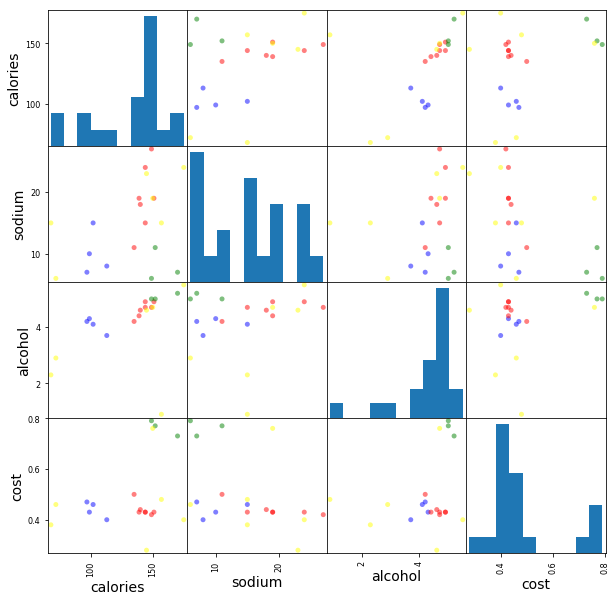

In [32]:
pd.plotting.scatter_matrix(X, c=colors[beer.cluster], figsize=(10,10), s=100)